## TRANSFORMING AND AUGMENTING IMAGES 🙀

[https://pytorch.org/vision/stable/transforms.html](https://pytorch.org/vision/stable/transforms.html)

#### Note ‼️

- Some transformations require image tensor to be in (0-255 range) or int_8.
- While, some other transformations require image tensor to be in (0-1 range) or float_32.

Before applying any transformation, make sure image tensor is in the correct range.

```python
# to convert image tensor
floatTransform = v2.ToDtype(torch.float32, scale=True),
integerTransform = v2.ToDtype(torch.uint8, scale=True),

```


type(img)=<class 'torch.Tensor'> 
img.shape=torch.Size([3, 512, 512])


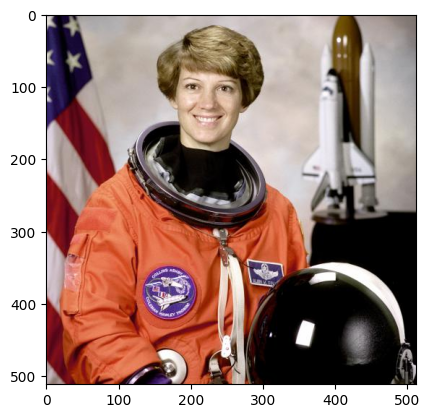

In [1]:
import torch
import numpy as np
from torchvision.io import read_image
import matplotlib.pyplot as plt
from torchvision.transforms import v2

img = read_image("data/astronaut.jpg")

print(f"{type(img)=} \n{img.shape=}")

plt.imshow(img.permute(1, 2, 0))

### Changing tensor image ranges


img.max()=tensor(255, dtype=torch.uint8)
float_img.max()=tensor(1.)
rescaled_img.max()=tensor(255, dtype=torch.uint8)


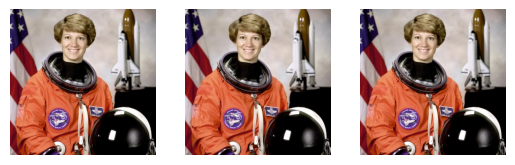

In [2]:
print(f"{img.max()=}")

floatTransform = v2.ToDtype(torch.float32, scale=True)
float_img = floatTransform(img)

print(f"{float_img.max()=}")

intTransform = v2.ToDtype(torch.uint8, scale=True)

rescaled_img = intTransform(float_img)
print(f"{rescaled_img.max()=}")

# visualize three images
_, ax = plt.subplots(nrows=1, ncols=3, squeeze=False)

ax[0][0].imshow(img.permute(1, 2, 0))
ax[0][1].imshow(float_img.permute(1, 2, 0))
ax[0][2].imshow(rescaled_img.permute(1, 2, 0))

# Turn off the axes for the second subplot
for i in range(3):
    ax[0][i].axis("off")

---
#### `helpers.py`. We will be using `plot function` of helpers.py file for visualizing images.
---

## `torchvision transforms`

- instantiate a transform, pass an input, get a transformed output


### RandomCrop


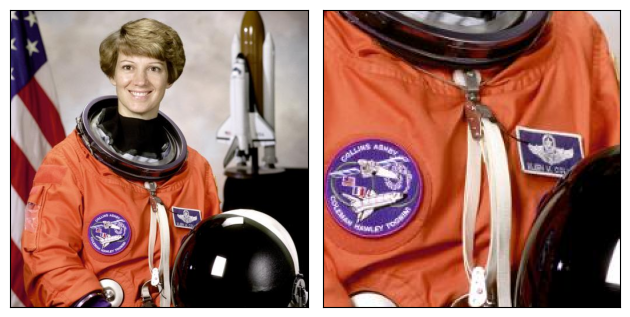

In [3]:
from helpers import plot

torch.manual_seed(42)

transform = v2.RandomCrop(size=(224, 224))
out = transform(img)

plot([img, out])

### RandomHorizontalFlip


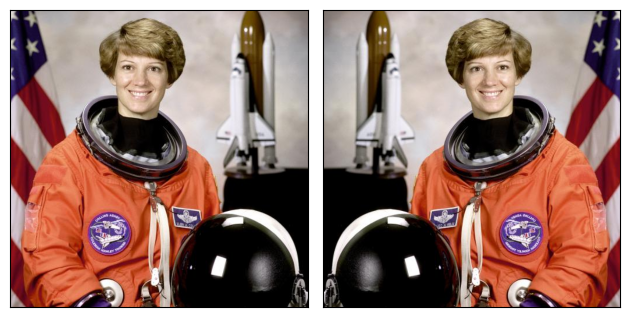

In [4]:
# here I've used probability=1, but normally you should use 0.5
horizontal_flip_transform = v2.RandomHorizontalFlip(p=1)
out = horizontal_flip_transform(img)

plot([img, out])

### RandomVerticalFlip


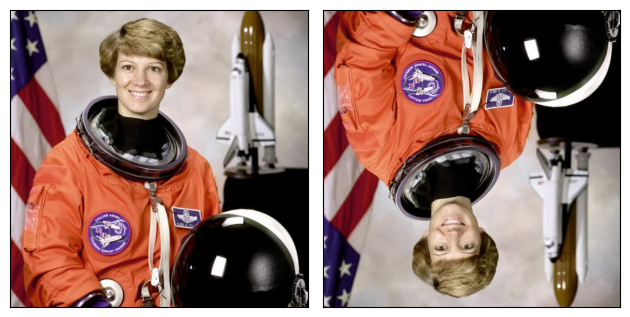

In [5]:
# here I've used probability=1, but normally you should use 0.5
vertical_flip_transform = v2.RandomVerticalFlip(p=1)
out = vertical_flip_transform(img)

plot([img, out])

### Padding


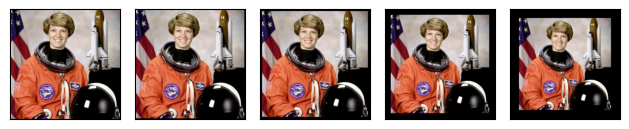

In [6]:
padded_imgs = [v2.Pad(padding=padding)(img) for padding in (3, 10, 30, 50)]
plot([img] + padded_imgs)

### RandomPerspective


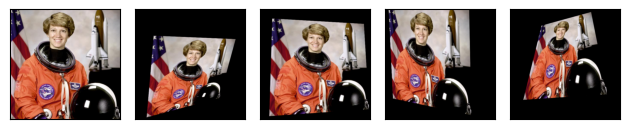

In [7]:
perspective_transformer = v2.RandomPerspective(distortion_scale=0.6, p=1.0)
perspective_imgs = [perspective_transformer(img) for _ in range(4)]
plot([img] + perspective_imgs)

### GrayScale


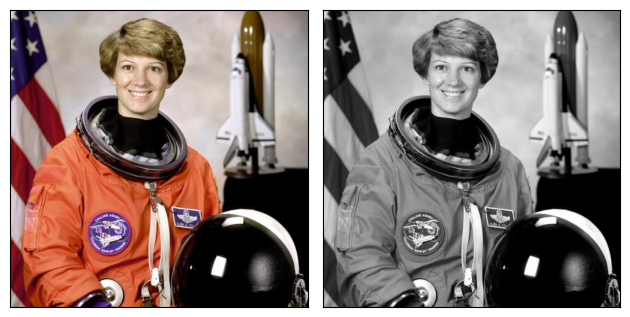

In [8]:
gray_img = v2.Grayscale()(img)
plot([img, gray_img], cmap="gray")

### Color Jitter


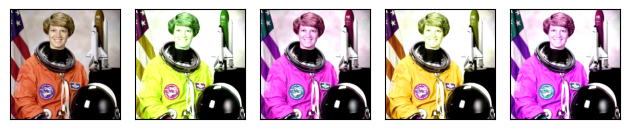

In [9]:
jitter = v2.ColorJitter(brightness=0.5, hue=0.3)
jittered_imgs = [jitter(img) for _ in range(4)]
plot([img] + jittered_imgs)

### Augmentation transforms

- `they are combinations of multiple transforms, either geometric or photometric, or both.`

### AutoAugment

- `The AutoAugment transform automatically augments data based on a given auto-augmentation policy.`
- Different auto-augmentation policy are:
  - IMAGENET,
  - CIFAR10
  - and SVHN.


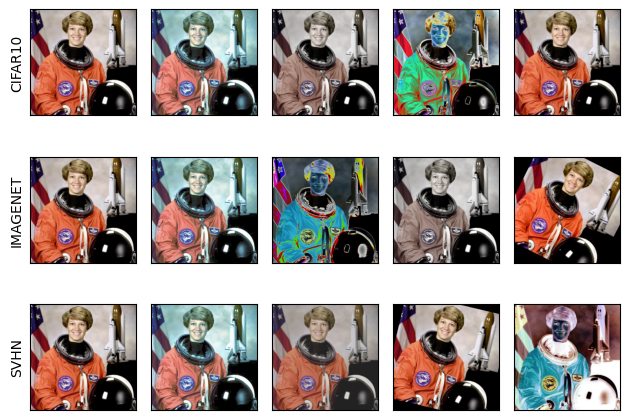

In [10]:
policies = [
    v2.AutoAugmentPolicy.CIFAR10,
    v2.AutoAugmentPolicy.IMAGENET,
    v2.AutoAugmentPolicy.SVHN,
]
augmenters = [v2.AutoAugment(policy) for policy in policies]
imgs = [[augmenter(img) for _ in range(4)] for augmenter in augmenters]
row_title = [str(policy).split(".")[-1] for policy in policies]
plot([[img] + row for row in imgs], row_title=row_title)

### Apply several transforms in one go (`compose`)


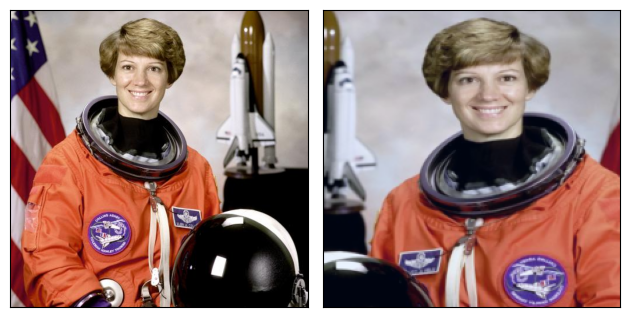

In [11]:
transforms = v2.Compose(
    [
        v2.RandomResizedCrop(size=(224, 224), antialias=True),
        v2.RandomHorizontalFlip(p=0.5),
        v2.ToDtype(torch.float32, scale=True),
        v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)
out = transforms(img)
plot([img, out])